# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


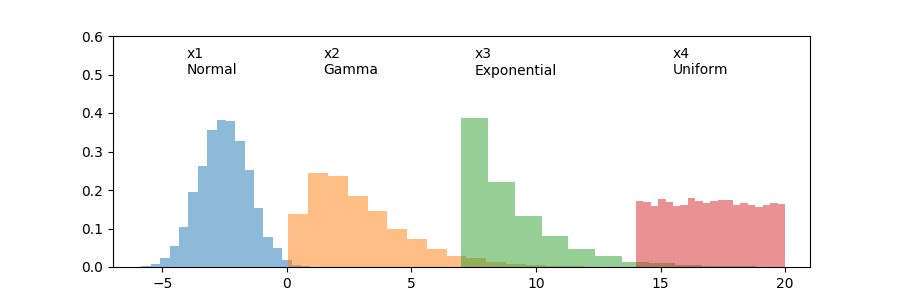

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


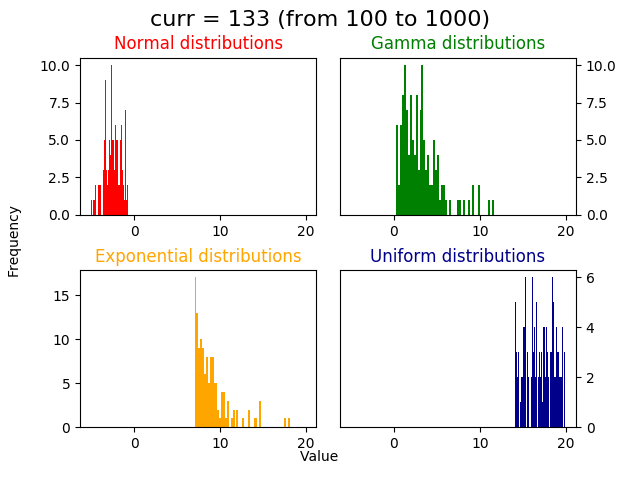

In [11]:
import matplotlib.animation as animation

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
plt.subplots_adjust(hspace = 0.35,wspace=0.1)
ax2.yaxis.tick_right()
ax4.yaxis.tick_right()
"""
fig=plt.figure(figsize=(11,4))
ax1=plt.subplot(1, 4, 1)
ax2=plt.subplot(1, 4, 2)
ax3=plt.subplot(1, 4, 3)
ax4=plt.subplot(1, 4, 4)"""

axs = [ax1,ax2,ax3,ax4]
xs = [x1,x2,x3,x4]
titles = ['Normal distributions','Gamma distributions', 'Exponential distributions','Uniform distributions']
colors = ['red','green','orange','darkblue']

fig.text(0.5, 0.04, 'Value', ha='center')
fig.text(0.01, 0.5, 'Frequency', va='center', rotation='vertical')

n=1000

def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr+100 == n :
        print('stop')
        a.event_source.stop()
    plt.cla()
    #plt.gca().set_ylabel('Frequency')
    #plt.gca().set_xlabel('Value')
    fig.suptitle('curr = {} (from 100 to 1000)'.format(curr+100), fontsize=16)
    for i in range(0,len(axs)) :
        axs[i].cla()
        bins = np.arange(-4, 4, 0.5)
        axs[i].hist(xs[i][:curr+100], bins=50,color=colors[i])
        axs[i].set_title(titles[i],color=colors[i])
    
a = animation.FuncAnimation(fig, update, interval=1000)

plt.show()


a.save('animation.mp4', fps=1000)